In [1]:
# IMPORT NECESSARY BUILT IN LIBRARIES
!pip install contractions
!pip install tqdm
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz
!pip install -U spacy
!pip install mlxtend
!pip install apyori
!pip install yellowbrick
!pip install texthero -q
!pip install textblob
!python -m spacy download en_core_web_sm
import matplotlib.ticker as ticker
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.metrics import BigramAssocMeasures
from yellowbrick.cluster import SilhouetteVisualizer
from mlxtend.preprocessing import TransactionEncoder
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg
import string
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import string
from mlxtend.frequent_patterns import apriori, association_rules
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz (532.3 MB)
  Using cached spacy-3.2.4-cp39-cp39-win_amd64.whl (11.3 MB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.4-cp39-cp39-win_amd64.whl (450 kB)
  Using cached thinc-8.0.17-cp39-cp39-win_amd64.whl (1.0 MB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.1
    Uninstalling catalogue-1.0.1:
      Successfully uninstalled catalogue-1.0.1
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 2.3.1 requires spacy<2.4.0,>=2.3.0, but you have spacy 3.2.4 which is incompatible.


  Using cached spacy-3.4.1-cp39-cp39-win_amd64.whl (11.8 MB)
  Using cached thinc-8.1.4-cp39-cp39-win_amd64.whl (1.3 MB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.4
    Uninstalling spacy-3.2.4:
      Successfully uninstalled spacy-3.2.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 2.3.1 requires spacy<2.4.0,>=2.3.0, but you have spacy 3.4.1 which is incompatible.
en-core-sci-lg 0.5.0 requires spacy<3.3.0,>=3.2.3, but you have spacy 3.4.1 which is incompatible.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Shilpi\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Shilpi\\AppData\\Local\\Temp\\pip-install-s2s_57va\\gensim_a9fb6e3919f04834a9497b95ff387b2b\\setup.py'"'"'; __file__='"'"'C:\\Users\\Shilpi\\AppData\\Local\\Temp\\pip-install-s2s_57va\\gensim_a9fb6e3919f04834a9497b95ff387b2b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Shilpi\AppData\Local\Temp\pip-wheel-t0ro_omc'
       cwd: C:\Users\Shilpi\AppData\Local\Temp\pip-install-s2s_57va\gensim_a9fb6e3919f04834a9497b95ff387b2b\
  Complete output (454 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


C:\Users\Shilpi\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.5.0) requires spaCy v3.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shilpi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shilpi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shilpi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\Shilpi

# Read the data and add header to column, Since we need ton consider only titles. Lets give header name as 'Title'

In [2]:
df = pd.read_csv("CORD19-10k.csv", 
                  sep='\t', 
                  names=["Title"])

# Lets see some data from title column

In [3]:
df.head()

,Title
0,Clinical features of culture-proven Mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense
3,Role of endothelin-1 in lung disease
4,Gene expression in epithelial cells in respons...


In [4]:
# From above we can see we have a column in proper format

# Lets see size of data

In [5]:
df.shape

(10000, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [7]:
# From above we see we have 1000 rows of data

# Data preprocessing

In [8]:
# Lets find the lenght of the title

In [9]:
df["length of message"] = df["Title"].apply(len)

In [10]:
df.head()

,Title,length of message
0,Clinical features of culture-proven Mycoplasma...,128
1,Nitric oxide: a pro-inflammatory mediator in l...,58
2,Surfactant protein-D and pulmonary host defense,47
3,Role of endothelin-1 in lung disease,36
4,Gene expression in epithelial cells in respons...,72


# Expanding Contractions

Contactions ate those little literary shortcuts we take where instead of "Should haave" we prefer "Should've" or where "Do not" quickly become Don't. We will add new coloumn to our dataframe called "Title_no_contract" aand apply laambda function to the "Title" filed which will expand any contactions.

In [11]:
df['title_with_no_contract']=df['Title'].apply(lambda x:[contractions.fix(word) for word in x.split()])
df.head()

,Title,length of message,title_with_no_contract
0,Clinical features of culture-proven Mycoplasma...,128,"[Clinical, features, of, culture-proven, Mycop..."
1,Nitric oxide: a pro-inflammatory mediator in l...,58,"[Nitric, oxide:, a, pro-inflammatory, mediator..."
2,Surfactant protein-D and pulmonary host defense,47,"[Surfactant, protein-D, and, pulmonary, host, ..."
3,Role of endothelin-1 in lung disease,36,"[Role, of, endothelin-1, in, lung, disease]"
4,Gene expression in epithelial cells in respons...,72,"[Gene, expression, in, epithelial, cells, in, ..."


Convert title_with_no_contract coloumn into string to proceed further

In [12]:
df['title_with_no_contract']=df['title_with_no_contract'].astype('string')
df.head()

,Title,length of message,title_with_no_contract
0,Clinical features of culture-proven Mycoplasma...,128,"['Clinical', 'features', 'of', 'culture-proven..."
1,Nitric oxide: a pro-inflammatory mediator in l...,58,"['Nitric', 'oxide:', 'a', 'pro-inflammatory', ..."
2,Surfactant protein-D and pulmonary host defense,47,"['Surfactant', 'protein-D', 'and', 'pulmonary'..."
3,Role of endothelin-1 in lung disease,36,"['Role', 'of', 'endothelin-1', 'in', 'lung', '..."
4,Gene expression in epithelial cells in respons...,72,"['Gene', 'expression', 'in', 'epithelial', 'ce..."


# Tokenization
tokenization will split each individual word into a token, we will apply NLTK.word_tokenize() function and create aa new columns names ='tokenized'

In [13]:
df['title_tokenized']=df['title_with_no_contract'].apply(word_tokenize)
df.head()

,Title,length of message,title_with_no_contract,title_tokenized
0,Clinical features of culture-proven Mycoplasma...,128,"['Clinical', 'features', 'of', 'culture-proven...","[[, 'Clinical, ', ,, 'features, ', ,, 'of, ', ..."
1,Nitric oxide: a pro-inflammatory mediator in l...,58,"['Nitric', 'oxide:', 'a', 'pro-inflammatory', ...","[[, 'Nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,..."
2,Surfactant protein-D and pulmonary host defense,47,"['Surfactant', 'protein-D', 'and', 'pulmonary'...","[[, 'Surfactant, ', ,, 'protein-D, ', ,, 'and,..."
3,Role of endothelin-1 in lung disease,36,"['Role', 'of', 'endothelin-1', 'in', 'lung', '...","[[, 'Role, ', ,, 'of, ', ,, 'endothelin-1, ', ..."
4,Gene expression in epithelial cells in respons...,72,"['Gene', 'expression', 'in', 'epithelial', 'ce...","[[, 'Gene, ', ,, 'expression, ', ,, 'in, ', ,,..."


# Converting all characters to Lowercase

Tarnsforming all words to lowercase is very common pre processing step. We will append a new coloumn names "lower" to the dataframe which will transfom all the tokenized words into lowercase

In [14]:
df['title_in_lowercase']=df['title_tokenized'].apply(lambda x:[word.lower() for word in x])
df.head()

,Title,length of message,title_with_no_contract,title_tokenized,title_in_lowercase
0,Clinical features of culture-proven Mycoplasma...,128,"['Clinical', 'features', 'of', 'culture-proven...","[[, 'Clinical, ', ,, 'features, ', ,, 'of, ', ...","[[, 'clinical, ', ,, 'features, ', ,, 'of, ', ..."
1,Nitric oxide: a pro-inflammatory mediator in l...,58,"['Nitric', 'oxide:', 'a', 'pro-inflammatory', ...","[[, 'Nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,...","[[, 'nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,..."
2,Surfactant protein-D and pulmonary host defense,47,"['Surfactant', 'protein-D', 'and', 'pulmonary'...","[[, 'Surfactant, ', ,, 'protein-D, ', ,, 'and,...","[[, 'surfactant, ', ,, 'protein-d, ', ,, 'and,..."
3,Role of endothelin-1 in lung disease,36,"['Role', 'of', 'endothelin-1', 'in', 'lung', '...","[[, 'Role, ', ,, 'of, ', ,, 'endothelin-1, ', ...","[[, 'role, ', ,, 'of, ', ,, 'endothelin-1, ', ..."
4,Gene expression in epithelial cells in respons...,72,"['Gene', 'expression', 'in', 'epithelial', 'ce...","[[, 'Gene, ', ,, 'expression, ', ,, 'in, ', ,,...","[[, 'gene, ', ,, 'expression, ', ,, 'in, ', ,,..."


# Removing punctuations - 

it is often removed from our data since they serve little value to the data. we will create a new coloumn which a the puntuation removed

In [15]:
punc=string.punctuation
df['title_with_no_punc']=df['title_in_lowercase'].apply(lambda x:[word for word in x if word not in punc])
df.head()

,Title,length of message,title_with_no_contract,title_tokenized,title_in_lowercase,title_with_no_punc
0,Clinical features of culture-proven Mycoplasma...,128,"['Clinical', 'features', 'of', 'culture-proven...","[[, 'Clinical, ', ,, 'features, ', ,, 'of, ', ...","[[, 'clinical, ', ,, 'features, ', ,, 'of, ', ...","['clinical, 'features, 'of, 'culture-proven, '..."
1,Nitric oxide: a pro-inflammatory mediator in l...,58,"['Nitric', 'oxide:', 'a', 'pro-inflammatory', ...","[[, 'Nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,...","[[, 'nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,...","['nitric, 'oxide, a, 'pro-inflammatory, 'media..."
2,Surfactant protein-D and pulmonary host defense,47,"['Surfactant', 'protein-D', 'and', 'pulmonary'...","[[, 'Surfactant, ', ,, 'protein-D, ', ,, 'and,...","[[, 'surfactant, ', ,, 'protein-d, ', ,, 'and,...","['surfactant, 'protein-d, 'and, 'pulmonary, 'h..."
3,Role of endothelin-1 in lung disease,36,"['Role', 'of', 'endothelin-1', 'in', 'lung', '...","[[, 'Role, ', ,, 'of, ', ,, 'endothelin-1, ', ...","[[, 'role, ', ,, 'of, ', ,, 'endothelin-1, ', ...","['role, 'of, 'endothelin-1, 'in, 'lung, 'disease]"
4,Gene expression in epithelial cells in respons...,72,"['Gene', 'expression', 'in', 'epithelial', 'ce...","[[, 'Gene, ', ,, 'expression, ', ,, 'in, ', ,,...","[[, 'gene, ', ,, 'expression, ', ,, 'in, ', ,,...","['gene, 'expression, 'in, 'epithelial, 'cells,..."


# 1 a) Perform per-processing step of stopword removal from title text of all articles.

# Removing stop words

We ultimately would want the expanded contractions to be tokenized seperaately. There fore lets convert the lists under the "Title_no_contract" column back into strings

In [16]:
stop_words=set(stopwords.words('english'))
df['title_with_stopwords_removed']=df['title_with_no_punc'].apply(lambda x:[word for word in x if word not in stop_words])
df.head()

,Title,length of message,title_with_no_contract,title_tokenized,title_in_lowercase,title_with_no_punc,title_with_stopwords_removed
0,Clinical features of culture-proven Mycoplasma...,128,"['Clinical', 'features', 'of', 'culture-proven...","[[, 'Clinical, ', ,, 'features, ', ,, 'of, ', ...","[[, 'clinical, ', ,, 'features, ', ,, 'of, ', ...","['clinical, 'features, 'of, 'culture-proven, '...","['clinical, 'features, 'of, 'culture-proven, '..."
1,Nitric oxide: a pro-inflammatory mediator in l...,58,"['Nitric', 'oxide:', 'a', 'pro-inflammatory', ...","[[, 'Nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,...","[[, 'nitric, ', ,, 'oxide, :, ', ,, ', a, ', ,...","['nitric, 'oxide, a, 'pro-inflammatory, 'media...","['nitric, 'oxide, 'pro-inflammatory, 'mediator..."
2,Surfactant protein-D and pulmonary host defense,47,"['Surfactant', 'protein-D', 'and', 'pulmonary'...","[[, 'Surfactant, ', ,, 'protein-D, ', ,, 'and,...","[[, 'surfactant, ', ,, 'protein-d, ', ,, 'and,...","['surfactant, 'protein-d, 'and, 'pulmonary, 'h...","['surfactant, 'protein-d, 'and, 'pulmonary, 'h..."
3,Role of endothelin-1 in lung disease,36,"['Role', 'of', 'endothelin-1', 'in', 'lung', '...","[[, 'Role, ', ,, 'of, ', ,, 'endothelin-1, ', ...","[[, 'role, ', ,, 'of, ', ,, 'endothelin-1, ', ...","['role, 'of, 'endothelin-1, 'in, 'lung, 'disease]","['role, 'of, 'endothelin-1, 'in, 'lung, 'disease]"
4,Gene expression in epithelial cells in respons...,72,"['Gene', 'expression', 'in', 'epithelial', 'ce...","[[, 'Gene, ', ,, 'expression, ', ,, 'in, ', ,,...","[[, 'gene, ', ,, 'expression, ', ,, 'in, ', ,,...","['gene, 'expression, 'in, 'epithelial, 'cells,...","['gene, 'expression, 'in, 'epithelial, 'cells,..."


# Finally we get clean data after various preprocessing which we will use further 

In [17]:
df['Clean_Data']=df['title_with_stopwords_removed'].astype('string')


# Lets drop null values if any

In [18]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Title                         10000 non-null  object
 1   length of message             10000 non-null  int64 
 2   title_with_no_contract        10000 non-null  string
 3   title_tokenized               10000 non-null  object
 4   title_in_lowercase            10000 non-null  object
 5   title_with_no_punc            10000 non-null  object
 6   title_with_stopwords_removed  10000 non-null  object
 7   Clean_Data                    10000 non-null  string
dtypes: int64(1), object(5), string(2)
memory usage: 625.1+ KB


# From above we can see there is no null vaues

# Q1 You take the CORD19-10k as input, and convert titles into corresponding feature vectors as below

# Convert titles into corresponding feature vectors 

In [19]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df['Clean_Data'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)
X

<10000x16372 sparse matrix of type '<class 'numpy.float64'>'
	with 92903 stored elements in Compressed Sparse Row format>

In [20]:
td_arr=X.toarray()
print(len(td_arr))
td_arr

10000


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
df_in= pd.DataFrame(td_arr)

In [22]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 16372 entries, 0 to 16371
dtypes: float64(16372)
memory usage: 1.2 GB


In [23]:
df_in.head()

,0,1,2,3,4,5,6,7,8,9,...,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

16372
['equity', 'equivalent', 'er', 'era', 'erad', 'eradication', 'ercc1', 'erectile', 'erfahrungen', 'erfahrungsaustausch', 'erfolgreich', 'erforderlich', 'erfordern', 'erfordernisse', 'erg', 'ergebnisse', 'ergosterol', 'erhã', 'erinyes', 'eriocheiris', 'erithacus', 'erk', 'erk1', 'erk2', 'erkrankungen', 'erks', 'erlangen', 'ernstig', 'ernã', 'erosion', 'erosive', 'erratum', 'erregerbedingten', 'erregerdiagnostik', 'erreichen', 'error', 'errors', 'erster', 'eruption', 'erwachsene', 'erwachsenen', 'erwachsenenalter', 'erwachsener', 'erweiterte', 'erworbene', 'erysiphe', 'erythematosus', 'erythrocyte', 'erythrocytes', 'erythrocytic', 'erî', 'es', 'es2', 'esboc', 'escalation', 'escape', 'eschar', 'escherichia', 'escherichla', 'escrt', 'esctaic', 'esculenta', 'esculentum', 'esi', 'esicm', 'esid', 'esophageal', 'esophagectomy', 'esophagitis', 'esophagology', 'esoteric', 'esp', 'espaã', 'especialistas', 'espn', 'espnic', 'espr', 'essay', 'essen', 'essential', 'essentialsaccharomyces', 'ess

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [26]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


11649
["''", "'a", "'b", "'c", "'d", "'e", "'f", "'g", "'h", "'i", "'j", "'k", "'l", "'m", "'n", "'o", "'p", "'q", "'r", "'s", "'t", "'u", "'v", "'w", "'x", "'y", "'z", "a'", 'aacr', 'aan', 'aav', 'ab', 'abbrevi', 'abc', 'abcb', 'abcd', 'abdomin', 'abdulaziz', 'aberr', 'abgabensystem', 'abgebrochenen', 'abgesagt', 'abil', 'abkl', 'ablat', 'abnorm', 'abo', 'abordaj', 'aborigin', 'abort']


In [27]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()
X3

<10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 64948 stored elements in Compressed Sparse Row format>

In [28]:
td_arr1=X3.toarray()
print(len(td_arr))
td_arr1

10000


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
df_final= pd.DataFrame(td_arr1)

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1000 entries, 0 to 999
dtypes: float64(1000)
memory usage: 76.3 MB


In [31]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  From above we got  feature vectors which is a sparse matrix with 64948 stored elements in Compressed Sparse Row format

# 1 b) For each title text, convert it into corresponding TF-IDF vector

# Converting title text into corresponding TF-IDF vector

Lets Calculate Term Frequency

In [32]:
def term_frequency(df):
    tf1 = (df['Title'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
    tf1.columns = ['words','tf']
    return tf1.head()

In [33]:
term_frequency(df)

,words,tf
0,Nitric,1
1,oxide:,1
2,a,1
3,pro-inflammatory,1
4,mediator,1


In [34]:
tf1 = (df['Title'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,Nitric,1
1,oxide:,1
2,a,1
3,pro-inflammatory,1
4,mediator,1


# Term Frequency – Inverse Document Frequency (TF-IDF)

In [35]:
tf1 = (df['Title'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

In [36]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Title'].str.contains(word)])))

In [37]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,Nitric,1,7.013116,7.013116
1,oxide:,1,9.210340,9.210340
2,a,1,0.032627,0.032627
3,pro-inflammatory,1,8.517193,8.517193
4,mediator,1,7.264430,7.264430
5,in,1,0.241817,0.241817
6,lung,1,3.937341,3.937341
7,disease?,1,3.239079,3.239079


In [38]:
# From above we can see TF-IDF

# 1 c) TF-IDF vectors are sparse and of large dimension. Reduce them into only 2 dimensions using PCA.

# PCA - Reducing sparse matrix into 2D

In [39]:
# For sparse matrix we can either use SparsePCA or TruncatedSVD for sparse matrix.

In [40]:
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import PCA
transformer = SparsePCA(n_components=2, random_state=0)
#transformer = PCA(n_components=2, random_state=0)
transformer.fit(df_final)
X_transformed = transformer.transform(df_final)
X_transformed
X_transformed.shape

(10000, 2)

In [41]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=2, random_state=42)
data = svd.fit_transform(df_final) 
data.shape

(10000, 2)

# Dimensionality Reduction for 2D Plotting

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X_transformed)

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 0.708s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.218666
[t-SNE] KL divergence after 1000 iterations: 2.647641


C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Shilpi\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


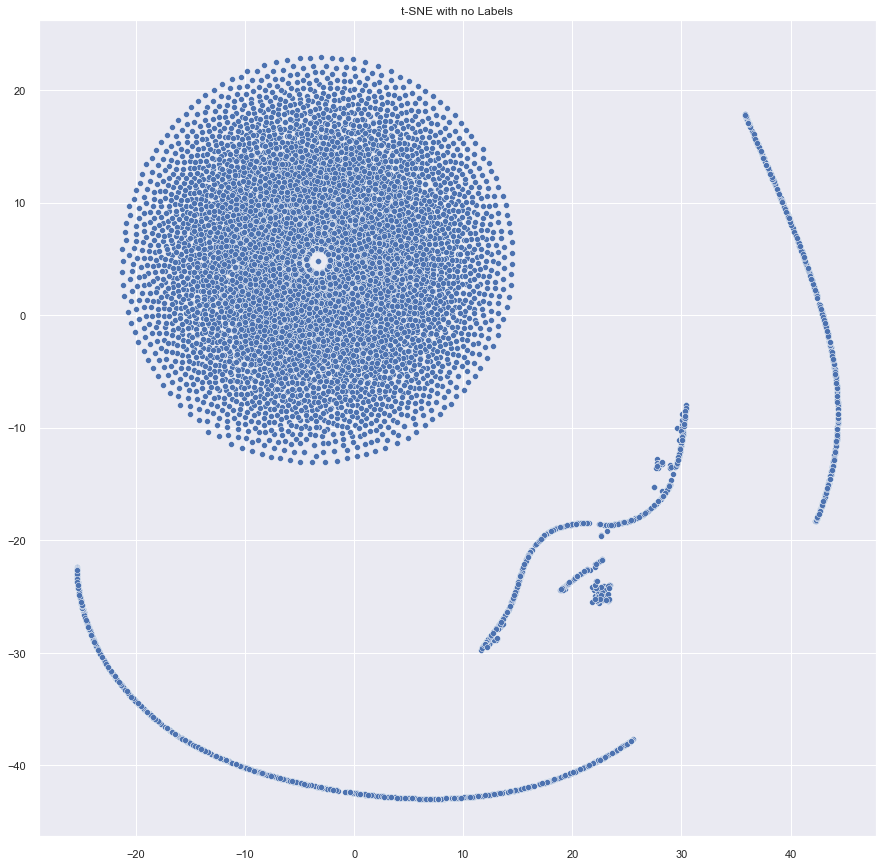

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

# Q2. Perform K-means clustering for different values of K (2,3,4,5) and evaluate the quality of clustering using Silhouette score

# Q2 a) For each value of K, plot clusters (all cluster points in same cluster with same color, cluster points in different cluster in different colors). [

In [44]:
# Before doing k mean clustering lets find the optimul number of cluster by using elbow method

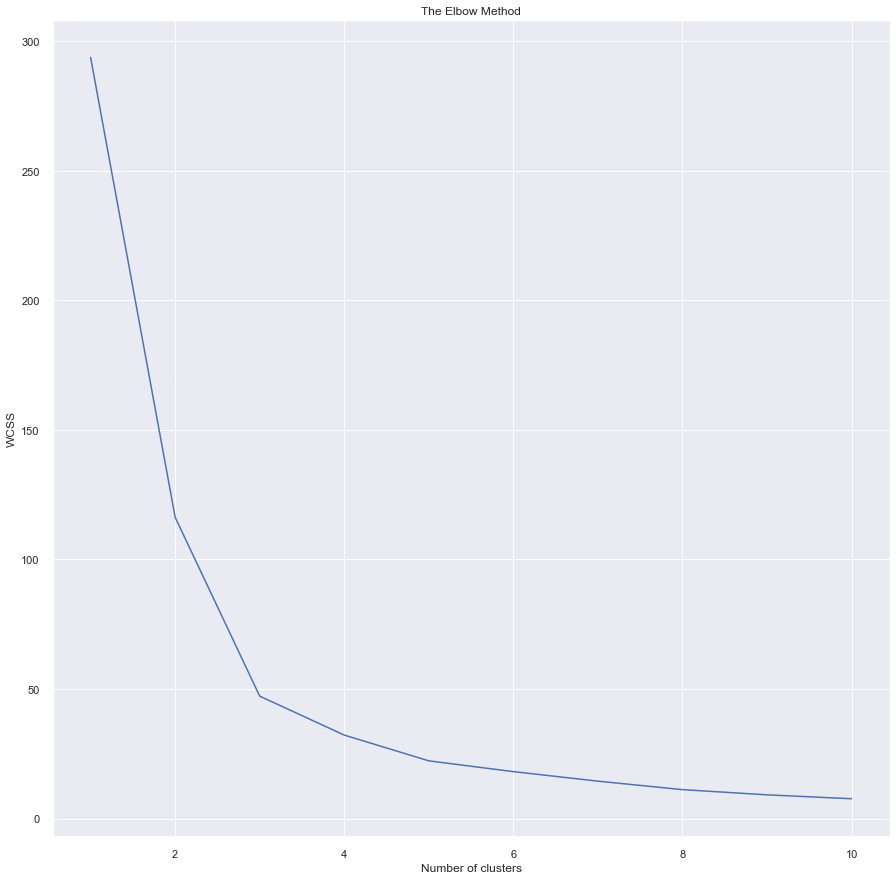

In [45]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

# From above it seems 2 number of cluster will be optimal

# K Mean clustering for K=2 and evaaluating quality using Silhouette score

In [46]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X_transformed)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
print(f'Silhouette Score(n=2): {silhouette_score(X_transformed, y_kmeans)}')

Silhouette Score(n=2): 0.8482680545240419


# K Mean clustering for K=3 and evaaluating quality using Silhouette score

In [48]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X_transformed)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
print(f'Silhouette Score(n=3): {silhouette_score(X_transformed, y_kmeans)}')

Silhouette Score(n=3): 0.8617260296325748


# K Mean clustering for K=4 and evaaluating quality using Silhouette score

In [50]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X_transformed)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
print(f'Silhouette Score(n=4): {silhouette_score(X_transformed, y_kmeans)}')

Silhouette Score(n=4): 0.8603304541359604


# K Mean clustering for K=5 and evaaluating quality using Silhouette score

In [52]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X_transformed)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
print(f'Silhouette Score(n=4): {silhouette_score(X_transformed, y_kmeans)}')

Silhouette Score(n=4): 0.8603304541359604


In [54]:
# For each value of K, plot clusters (all cluster points in same cluster with same color, cluster points in different cluster in different colors). [1 pt]

# For K=2

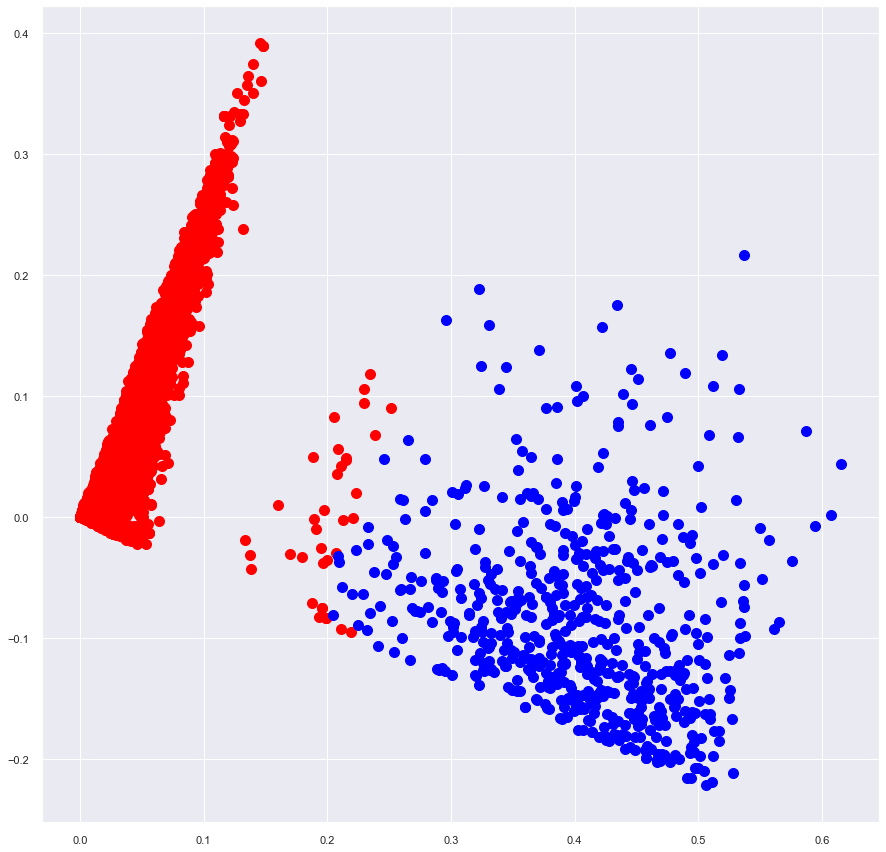

In [55]:
plt.scatter(data[y_kmeans==0, 0],data[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

# For K=3

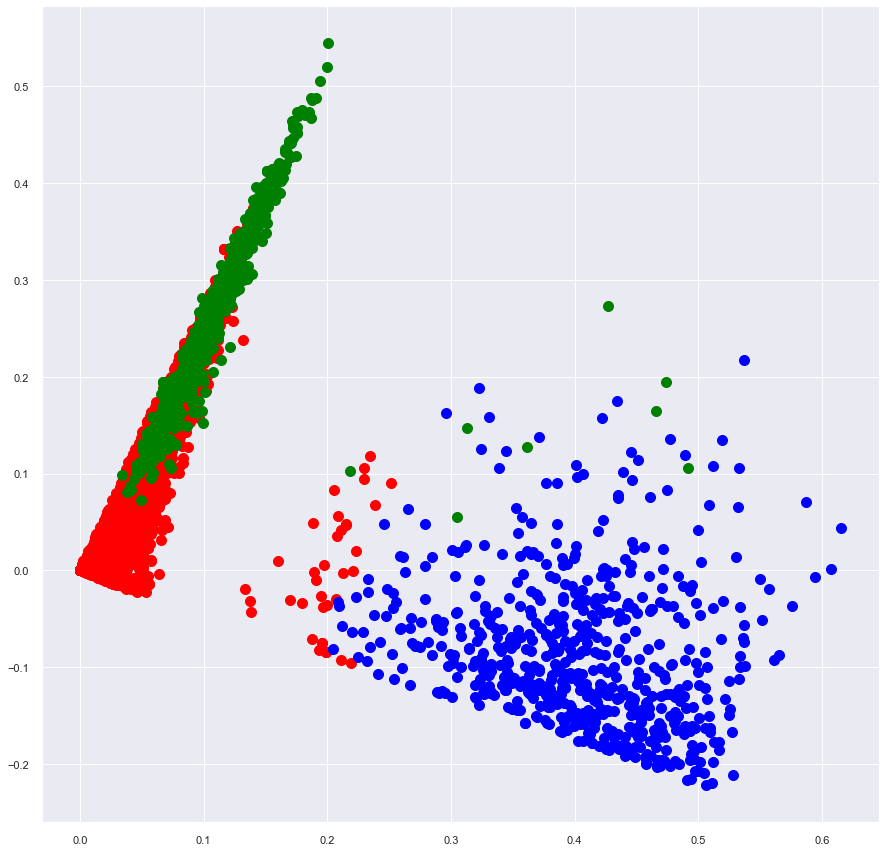

In [56]:
plt.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

# For K=4

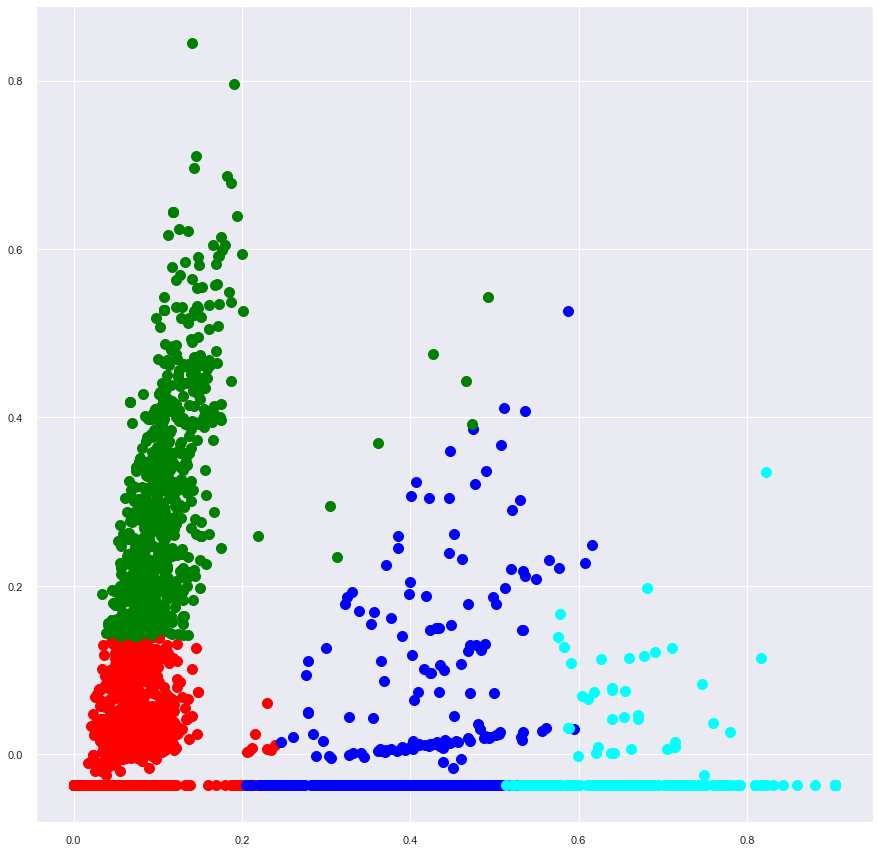

In [57]:
plt.scatter(data[y_kmeans==0, 0], X_transformed[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], X_transformed[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans==2, 0], X_transformed[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data[y_kmeans==3, 0], X_transformed[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

# For K=5

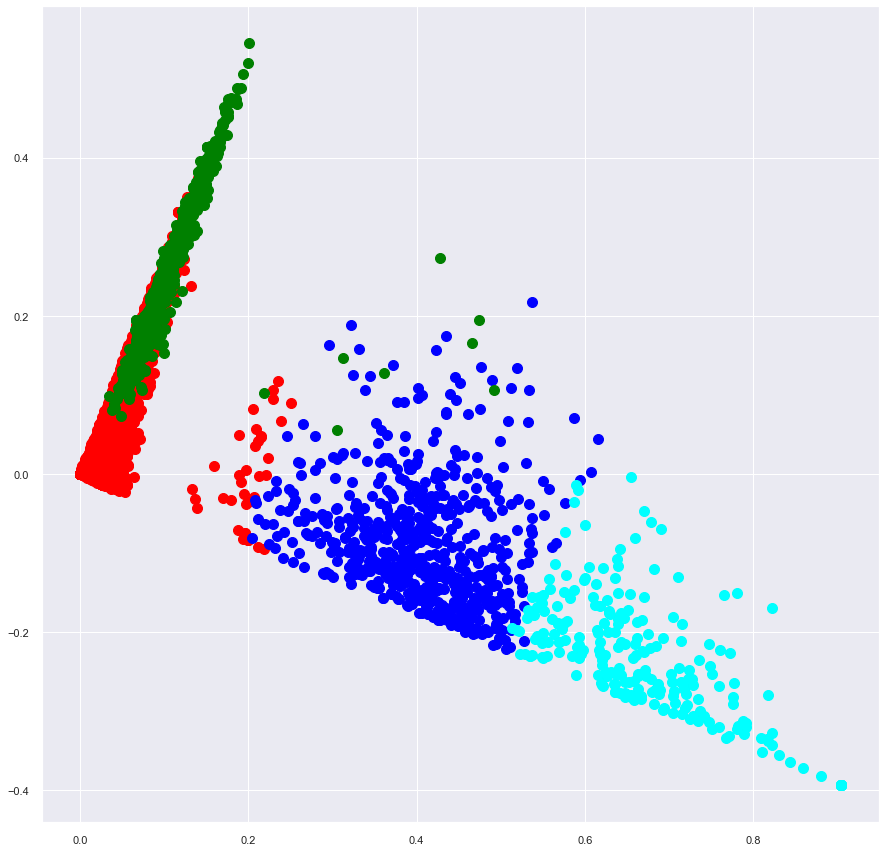

In [58]:
plt.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(data[y_kmeans==4, 0], data[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

# Q 2 b) Draw a bar graph with X-axis as K value and Y-axis as silhouette score

For N_clusters =  2 The average silhouette_score is : 0.8482680545240419
For N_clusters =  3 The average silhouette_score is : 0.8617260296325748
For N_clusters =  4 The average silhouette_score is : 0.8603336485289182
For N_clusters =  5 The average silhouette_score is : 0.8384202999924977
For N_clusters =  6 The average silhouette_score is : 0.8487485240737116
For N_clusters =  7 The average silhouette_score is : 0.8522980766591872
For N_clusters =  8 The average silhouette_score is : 0.853986973545018
For N_clusters =  9 The average silhouette_score is : 0.8622808841334659
For N_clusters =  10 The average silhouette_score is : 0.8613368484383447


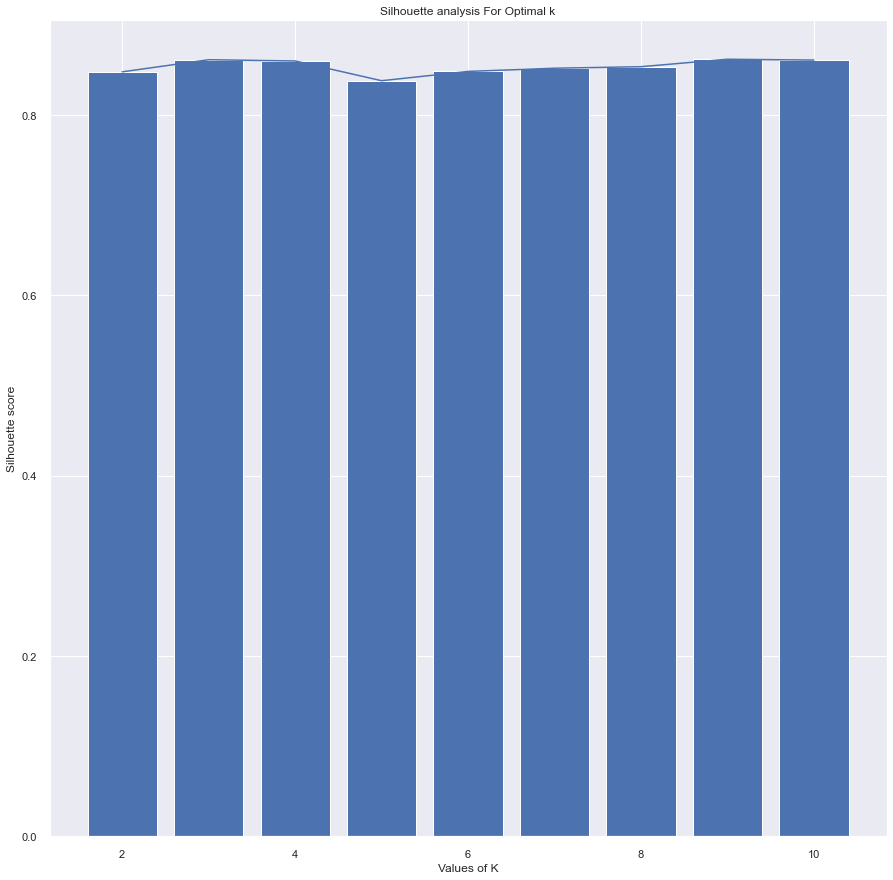

In [59]:
#Plotting a graph to look at the silhoutte score for different clusters

range_of_clusters=[2,3,4,5,6,7,8,9,10]
arr_sil=[]
for i_count in range_of_clusters:
    km=KMeans(n_clusters=i_count)
    km.fit(X_transformed)
    cluster_labels= km.fit_predict(X_transformed)
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For N_clusters = ",i_count,"The average silhouette_score is :",silhouette_avg)
    arr_sil.append(silhouette_avg)
plt.plot(range_of_clusters,arr_sil, 'bx-')
plt.bar(range_of_clusters,arr_sil)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Q 2 c)  Explain (1-2 lines) which is the best clustering and why.

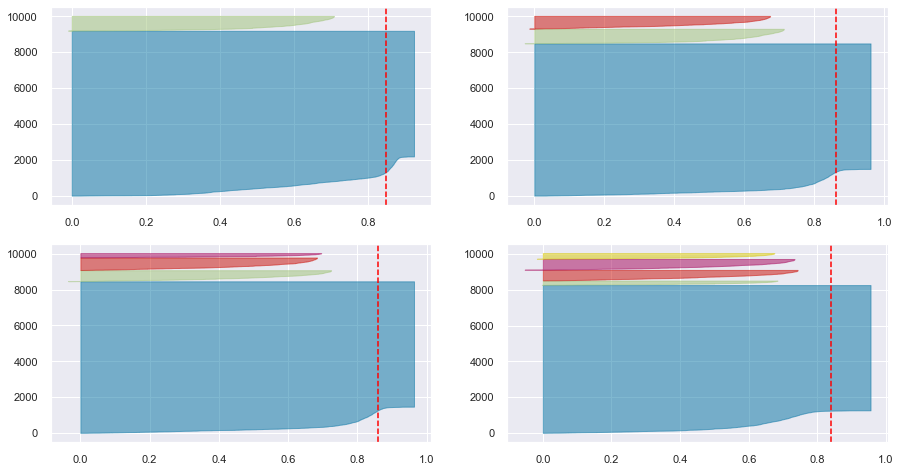

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_transformed)

# We can say that the clusters are well apart from each other as the silhouette score is closer to 1
# From above graph and score we can say that the optimal number of clusters is 3 as its silhouette score is greater than that of other 3 clusters.
# Silhouette Score(n=3 or n=3): 0.8617260296325748


# Q 3. Consider the per-processed title text of all articles and find words which frequently occur together. [2 points]

# We will find ngrams and Collocations

In [61]:
from textblob import TextBlob
def combination_of_words(df):
    return (TextBlob(df['Title'][0]).ngrams(2))

In [62]:
combination_of_words(df)

[WordList(['Clinical', 'features']),
 WordList(['features', 'of']),
 WordList(['of', 'culture-proven']),
 WordList(['culture-proven', 'Mycoplasma']),
 WordList(['Mycoplasma', 'pneumoniae']),
 WordList(['pneumoniae', 'infections']),
 WordList(['infections', 'at']),
 WordList(['at', 'King']),
 WordList(['King', 'Abdulaziz']),
 WordList(['Abdulaziz', 'University']),
 WordList(['University', 'Hospital']),
 WordList(['Hospital', 'Jeddah']),
 WordList(['Jeddah', 'Saudi']),
 WordList(['Saudi', 'Arabia'])]

# Above 2 words are frequently occur together

In [63]:
from nltk import bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
df['Body-Collocation'] = df.apply(lambda df: BigramCollocationFinder.from_words(df['Title']),axis=1)
df['Body-Collocation'] = df['Body-Collocation'].apply(lambda df: df.nbest(bigram_measures.pmi, 3))
print (df['Body-Collocation'])

0       [(M, y), (h, ,), (-, p)]
1       [(f, l), (l, u), (n, f)]
2       [(-, D), (l, m), (S, u)]
3       [(-, 1), (t, h), (a, s)]
4       [(u, m), (t, h), (a, l)]
                  ...           
9995    [(, ), (â, ), (o, u)]
9996    [(B, r), (I, m), (P, r)]
9997    [(c, h), (s, c), (u, l)]
9998    [(D, o), (b, o), (o, g)]
9999    [(C, h), (b, y), (g, y)]
Name: Body-Collocation, Length: 10000, dtype: object


In [64]:
from nltk import bigrams
bigram_measures = nltk.collocations.TrigramAssocMeasures()
df['Body-Collocation'] = df.apply(lambda df: TrigramCollocationFinder.from_words(df['Title']),axis=1)
df['Body-Collocation'] = df['Body-Collocation'].apply(lambda df: df.nbest(bigram_measures.pmi, 3))
print (df['Body-Collocation'])

0       [(M, y, c), (A, b, d), (-, p, r)]
1       [(u, n, g), (l, u, n), (n, f, l)]
2       [(u, l, m), (l, m, o), (p, u, l)]
3       [(o, t, h), (n, -, 1), (u, n, g)]
4       [(m, o, v), (u, m, o), (x, p, r)]
                      ...                
9995    [(â, , ), (k, s, ,), (, , a)]
9996    [(I, m, m), (, , M), (, , P)]
9997    [(s, c, h), (c, h, e), (d, u, l)]
9998    [(D, o, g), (b, o, d), (o, g, s)]
9999    [(C, h, a), (s,  , E), (o, g, y)]
Name: Body-Collocation, Length: 10000, dtype: object


# 3 a. find association rules of minimum of length 2 with 20% confidence and 10% support. 

In [65]:
dataset = df['Clean_Data'].apply(lambda x: x.split()).to_numpy()
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,"""''"",","""''""]","""'+"",","""'+1"",","""'+100"",","""'-"",","""'-1"",","""'-3"",","""'-b"",","""'-based"",",...,"['â\\x80\\x9cwith',","['â\\x80\\x9eoff-label',","['â¿quã©',","['â¿volverã¡',",['ã\\x89ditorial'],"['ã\\x89pidã©miologie',","['ã\\x9cber',","['ã\\x9cberraschung',","['ã\\x9cbersicht',","['î´-secretase',"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
frequent_itemsets = apriori(new_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules['antecedent_len'] = rules["antecedents"].apply(lambda x: len(x))

In [67]:
rules[(rules['antecedent_len'] >= 2) & (rules['support']>= 0.1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
200,"(""'in"",, ""'of"",)","(""'and"",)",0.2366,0.3817,0.1087,0.459425,1.203629,0.018390,1.143782,2
201,"(""'in"",, ""'and"",)","(""'of"",)",0.1741,0.5388,0.1087,0.624354,1.158786,0.014895,1.227751,2
202,"(""'and"",, ""'of"",)","(""'in"",)",0.2358,0.4040,0.1087,0.460984,1.141049,0.013437,1.105718,2


In [68]:
rules[(rules['antecedent_len'] >= 2) & (rules['support']>= 0.01)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
154,"(""'in"",, ""'acute"",)","(""'and"",)",0.0233,0.3817,0.0102,0.437768,1.146891,0.001306,1.099724,2
155,"(""'acute"",, ""'and"",)","(""'in"",)",0.0153,0.4040,0.0102,0.666667,1.650165,0.004019,1.788000,2
157,"(""'in"",, ""'acute"",)","(""'of"",)",0.0233,0.5388,0.0140,0.600858,1.115179,0.001446,1.155480,2
158,"(""'acute"",, ""'of"",)","(""'in"",)",0.0210,0.4040,0.0140,0.666667,1.650165,0.005516,1.788000,2
160,"(""'in"",, ""'acute"",)","(""'respiratory"",)",0.0233,0.0526,0.0122,0.523605,9.954471,0.010974,1.988686,2
...,...,...,...,...,...,...,...,...,...,...
454,"(""'virus"",, ""'the"",)","(""'in"",, ""'of"",)",0.0328,0.2366,0.0136,0.414634,1.752469,0.005840,1.304142,2
455,"(""'in"",, ""'the"",, ""'with"",)","(""'of"",)",0.0148,0.5388,0.0116,0.783784,1.454684,0.003626,2.133050,3
456,"(""'in"",, ""'with"",, ""'of"",)","(""'the"",)",0.0364,0.2570,0.0116,0.318681,1.240005,0.002245,1.090532,3
457,"(""'the"",, ""'with"",, ""'of"",)","(""'in"",)",0.0196,0.4040,0.0116,0.591837,1.464942,0.003682,1.460200,3


# there is 242 rules  with matching criteria and all rules are as below

In [69]:
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(""'acute"",)","(""'and"",)",0.0353,0.3817,0.0153,0.433428,1.135519,0.001826,1.091300,1
1,"(""'acute"",)","(""'in"",)",0.0353,0.4040,0.0233,0.660057,1.633804,0.009039,1.753233,1
2,"(""'acute"",)","(""'of"",)",0.0353,0.5388,0.0210,0.594901,1.104122,0.001980,1.138487,1
3,"(""'acute"",)","(""'respiratory"",)",0.0353,0.0526,0.0179,0.507082,9.640345,0.016043,1.922024,1
4,"(""'respiratory"",)","(""'acute"",)",0.0526,0.0353,0.0179,0.340304,9.640345,0.016043,1.462341,1
...,...,...,...,...,...,...,...,...,...,...
454,"(""'virus"",, ""'the"",)","(""'in"",, ""'of"",)",0.0328,0.2366,0.0136,0.414634,1.752469,0.005840,1.304142,2
455,"(""'in"",, ""'the"",, ""'with"",)","(""'of"",)",0.0148,0.5388,0.0116,0.783784,1.454684,0.003626,2.133050,3
456,"(""'in"",, ""'with"",, ""'of"",)","(""'the"",)",0.0364,0.2570,0.0116,0.318681,1.240005,0.002245,1.090532,3
457,"(""'the"",, ""'with"",, ""'of"",)","(""'in"",)",0.0196,0.4040,0.0116,0.591837,1.464942,0.003682,1.460200,3


In [70]:
print(rules)

                     antecedents        consequents  antecedent support  \
0                    ("'acute",)          ("'and",)              0.0353   
1                    ("'acute",)           ("'in",)              0.0353   
2                    ("'acute",)           ("'of",)              0.0353   
3                    ("'acute",)  ("'respiratory",)              0.0353   
4              ("'respiratory",)        ("'acute",)              0.0526   
..                           ...                ...                 ...   
454         ("'virus",, "'the",)   ("'in",, "'of",)              0.0328   
455  ("'in",, "'the",, "'with",)           ("'of",)              0.0148   
456   ("'in",, "'with",, "'of",)          ("'the",)              0.0364   
457  ("'the",, "'with",, "'of",)           ("'in",)              0.0196   
458          ("'the",, "'with",)   ("'in",, "'of",)              0.0242   

     consequent support  support  confidence      lift  leverage  conviction  \
0                0.

# We can interpret our resulting table as follows. We will interpret only 1 st result


Support Value -> shows that The rate of seeing acute and 'and' together in all titles is 0.0153.

Confidence Value -> shows that 43% of title which contains 'acute' also contains 'and'

Lift Value -> occuring of acute  increase by 1.135519 for title with word 'and'

# Generate scatterplot using support and confidence

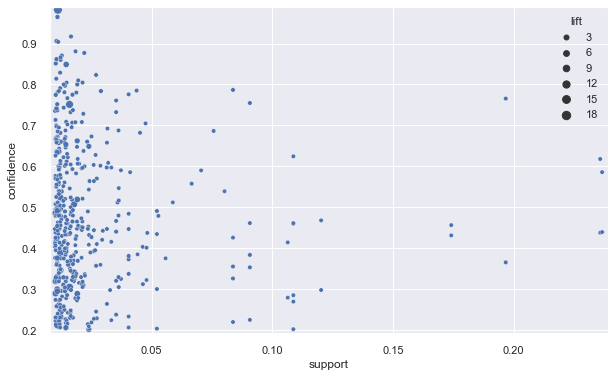

In [71]:

plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

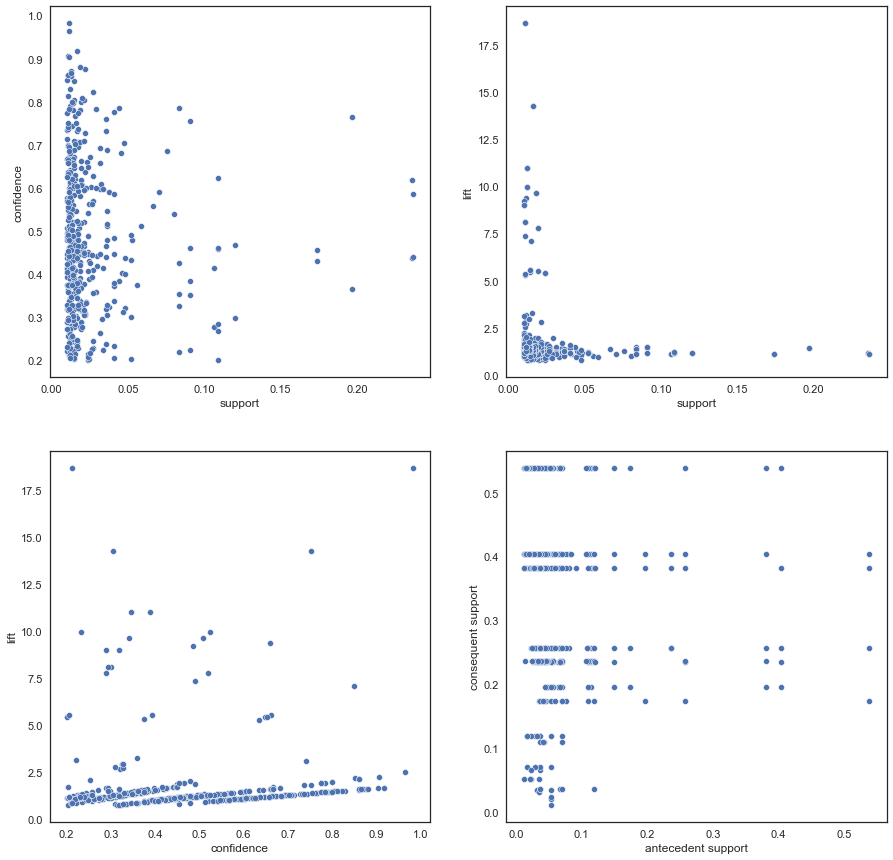

In [72]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

# From aabove we can see there are 459 rules

# Q 3 b) Draw a line graph with Y-axis as number of association rules of minimum length 2, and X-axis as confidence percentage (ranging from 0%, 10%, 20%, ...., 100%)

In [73]:
confidence_buckets = {'0':0 ,'10':0, '20':0, '30':0, '40':0, '50':0, '60':0, '70':0, '80':0, '90':0, '100':0}

for index, row in rules[(rules['antecedent_len'] >= 2)].iterrows():
    
    if row['confidence'] == 0:
        confidence_buckets['0'] += 1
    if row['confidence'] > 0 and row['confidence'] <= 0.10:
        confidence_buckets['10'] += 1
    if row['confidence'] > 0.10 and row['confidence'] <= 0.20:
        confidence_buckets['20'] += 1
    if row['confidence'] > 0.20 and row['confidence'] <= 0.30:
        confidence_buckets['30'] += 1
    if row['confidence'] > 0.30 and row['confidence'] <= 0.40:
        confidence_buckets['40'] += 1
    if row['confidence'] > 0.40 and row['confidence'] <= 0.50:
        confidence_buckets['50'] += 1
    if row['confidence'] > 0.50 and row['confidence'] <= 0.60:
        confidence_buckets['60'] += 1
    if row['confidence'] > 0.60 and row['confidence'] <= 0.70:
        confidence_buckets['70'] += 1
    if row['confidence'] > 0.70 and row['confidence'] <= 0.80:
        confidence_buckets['80'] += 1
    if row['confidence'] > 0.80 and row['confidence'] <= 0.90:
        confidence_buckets['90'] += 1
    if row['confidence'] > 0.90 and row['confidence'] <= 1:
        confidence_buckets['100'] += 1
        

C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)


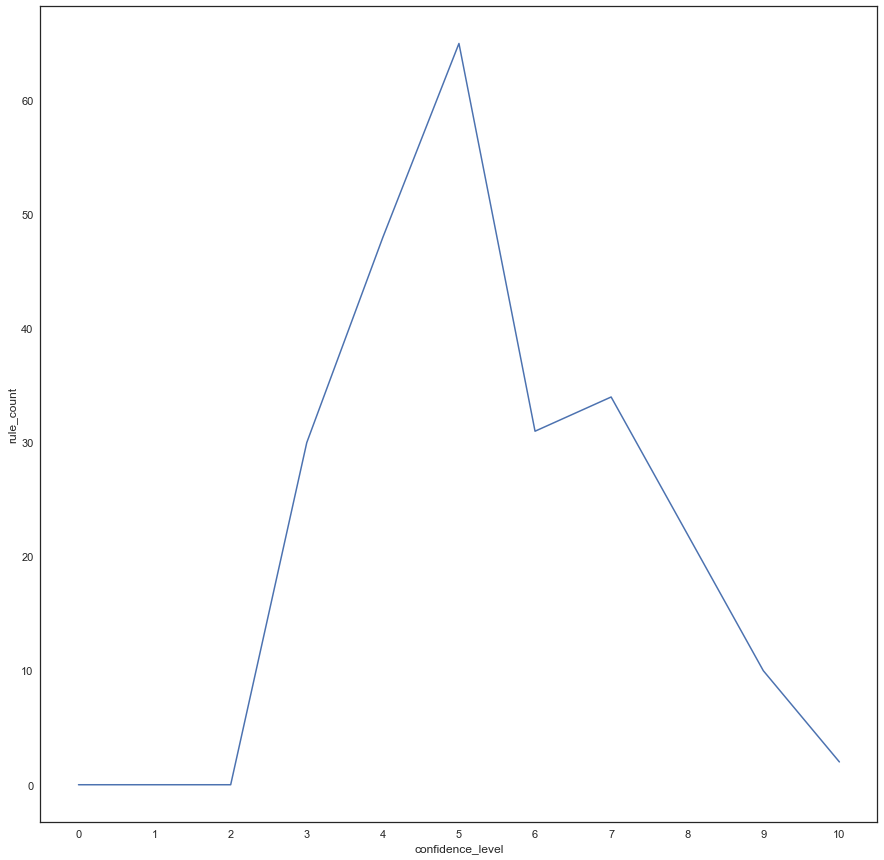

In [74]:
import matplotlib.ticker as ticker
confidence_buckets_df = pd.DataFrame(confidence_buckets.items(), columns=['confidence_level', 'rule_count'])

ax = sns.lineplot(data=confidence_buckets_df, x="confidence_level", y="rule_count")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()